In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Lim Otto\Documents\world data 2023.csv")

In [3]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [4]:
df.shape

(195, 35)

In [6]:
column_types = df.dtypes

print(column_types)

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [8]:
#Changing data type for population to float, to be used in aggregation function later for visualisation
df['Population'] = df['Population'].str.replace(',', '', regex=True).astype(float)


In [9]:
df.head

<bound method NDFrame.head of          Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan               60           AF                58.10%   
1        Albania              105           AL                43.10%   
2        Algeria               18           DZ                17.40%   
3        Andorra              164           AD                40.00%   
4         Angola               26           AO                47.50%   
..           ...              ...          ...                   ...   
190    Venezuela               32           VE                24.50%   
191      Vietnam              314           VN                39.30%   
192        Yemen               56           YE                44.60%   
193       Zambia               25           ZM                32.10%   
194     Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0          652,230           323,000   

In [10]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [11]:
df = df[['Country','Birth Rate','Fertility Rate','Infant mortality','Life expectancy','Physicians per thousand', 'Population']]

In [12]:
df.info

<bound method DataFrame.info of          Country  Birth Rate  Fertility Rate  Infant mortality  \
0    Afghanistan       32.49            4.47              47.9   
1        Albania       11.78            1.62               7.8   
2        Algeria       24.28            3.02              20.1   
3        Andorra        7.20            1.27               2.7   
4         Angola       40.73            5.52              51.6   
..           ...         ...             ...               ...   
190    Venezuela       17.88            2.27              21.4   
191      Vietnam       16.75            2.05              16.5   
192        Yemen       30.45            3.79              42.9   
193       Zambia       36.19            4.63              40.4   
194     Zimbabwe       30.68            3.62              33.9   

     Life expectancy  Physicians per thousand  Population  
0               64.5                     0.28  38041754.0  
1               78.5                     1.20   2854191

In [13]:
columns_to_impute = ['Country','Birth Rate','Fertility Rate','Infant mortality','Life expectancy','Physicians per thousand', 'Population']

In [14]:
#exploring the data and clean the null values
median_values = df[columns_to_impute].median(numeric_only=True)

In [15]:
df[columns_to_impute] = df[columns_to_impute].fillna(median_values)

C:\Users\Lim Otto\AppData\Local\Temp\ipykernel_2828\743552077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_impute] = df[columns_to_impute].fillna(median_values)


In [16]:
df.rename(columns={'Birth Rate': 'Birth_Rate'},inplace = True)
df.rename(columns={'Fertility Rate': 'Fertility_Rate'},inplace = True)
df.rename(columns={'Infant mortality': 'Infant_Mortality'},inplace = True)
df.rename(columns={'Life expectancy': 'Life_Expectancy'},inplace = True)
df.rename(columns={'Physicians per thousand': 'Physicians_Per_Thousand'},inplace = True)

C:\Users\Lim Otto\AppData\Local\Temp\ipykernel_2828\647374848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Birth Rate': 'Birth_Rate'},inplace = True)
C:\Users\Lim Otto\AppData\Local\Temp\ipykernel_2828\647374848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Fertility Rate': 'Fertility_Rate'},inplace = True)
C:\Users\Lim Otto\AppData\Local\Temp\ipykernel_2828\647374848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [17]:
df = df.dropna()

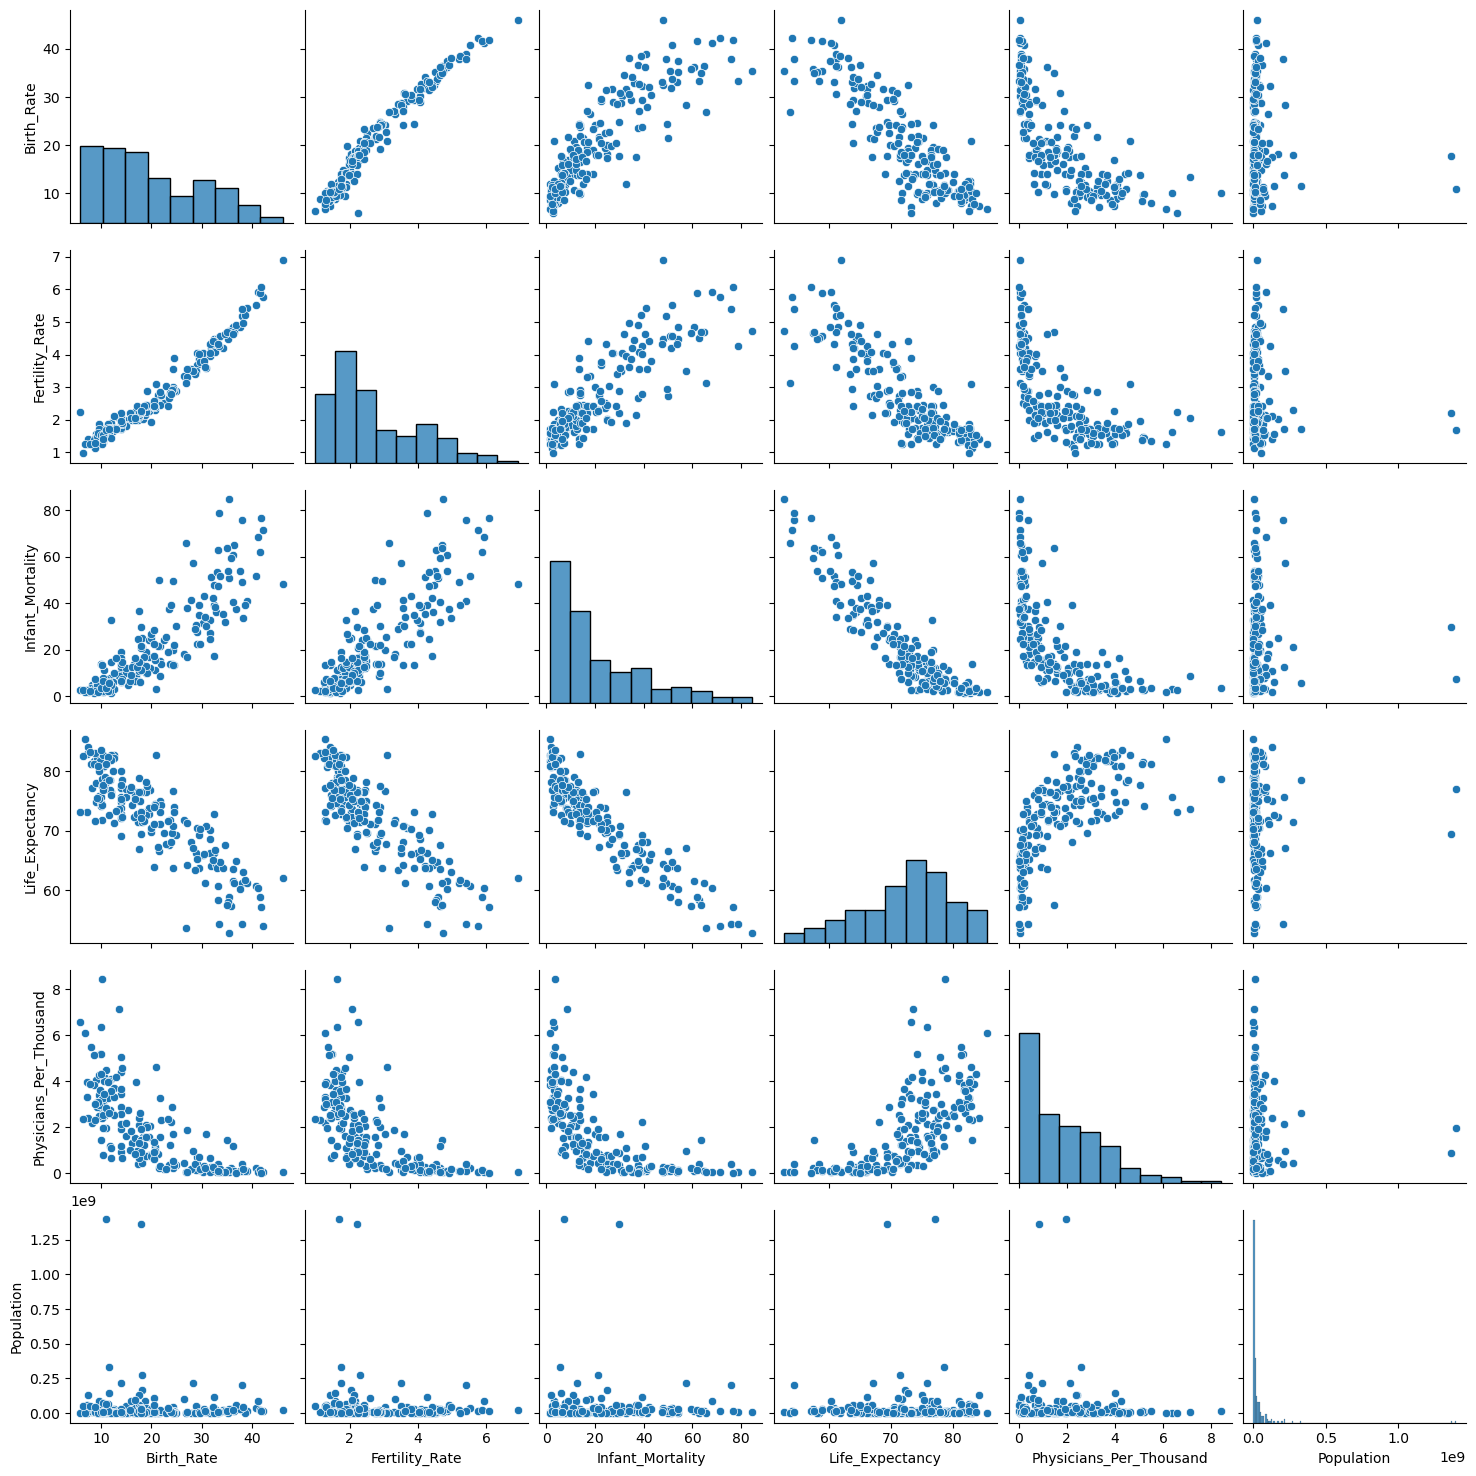

In [18]:
sns.pairplot(df)

C:\Users\Lim Otto\AppData\Local\Temp\ipykernel_2828\2409963745.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

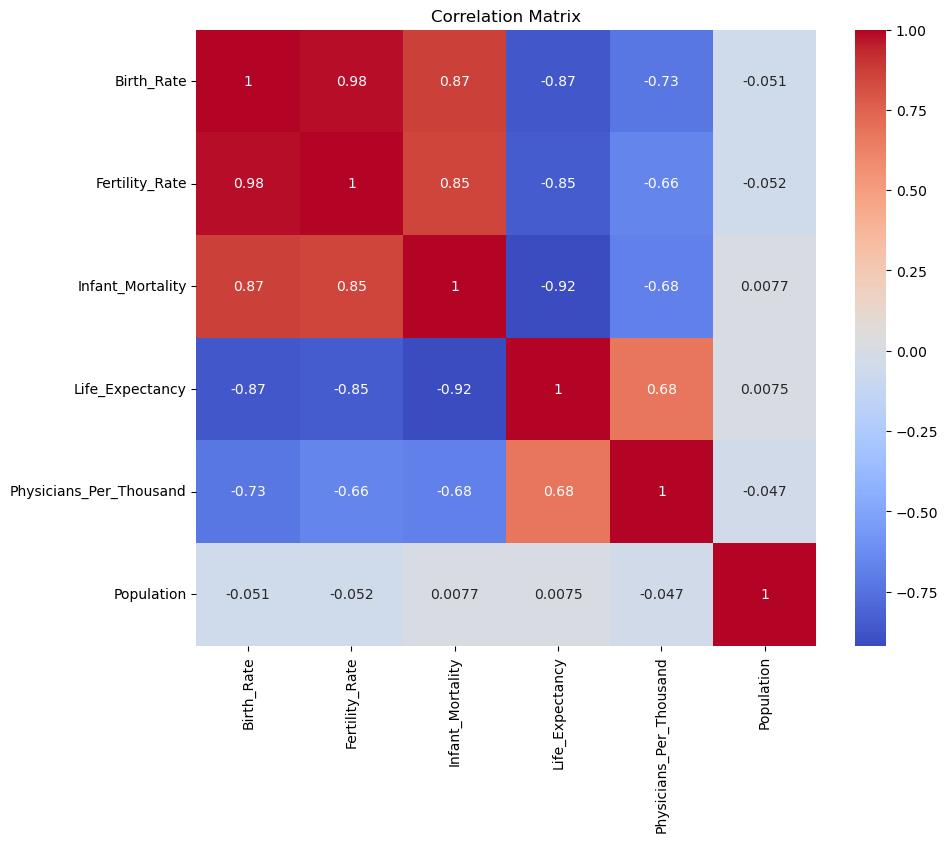

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

ValueError: num must be an integer with 1 <= num <= 6, not 7

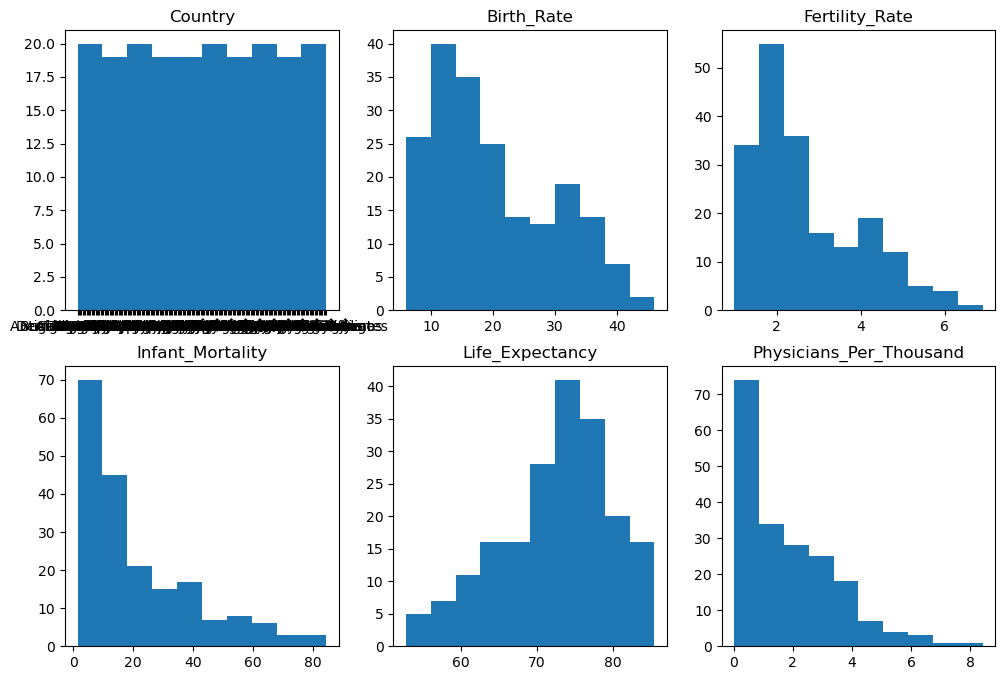

In [22]:
# Using subplot to visualize histogram for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatter Plot: Birth Rate vs. Life Expectancy')

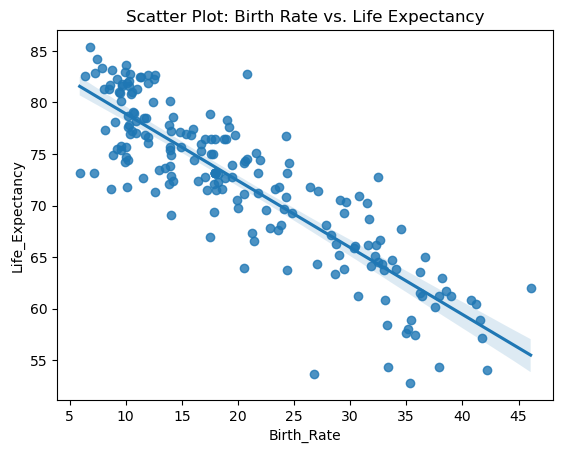

In [23]:
sns.regplot(data=df, x='Birth_Rate', y='Life_Expectancy')
plt.title('Scatter Plot: Birth Rate vs. Life Expectancy')

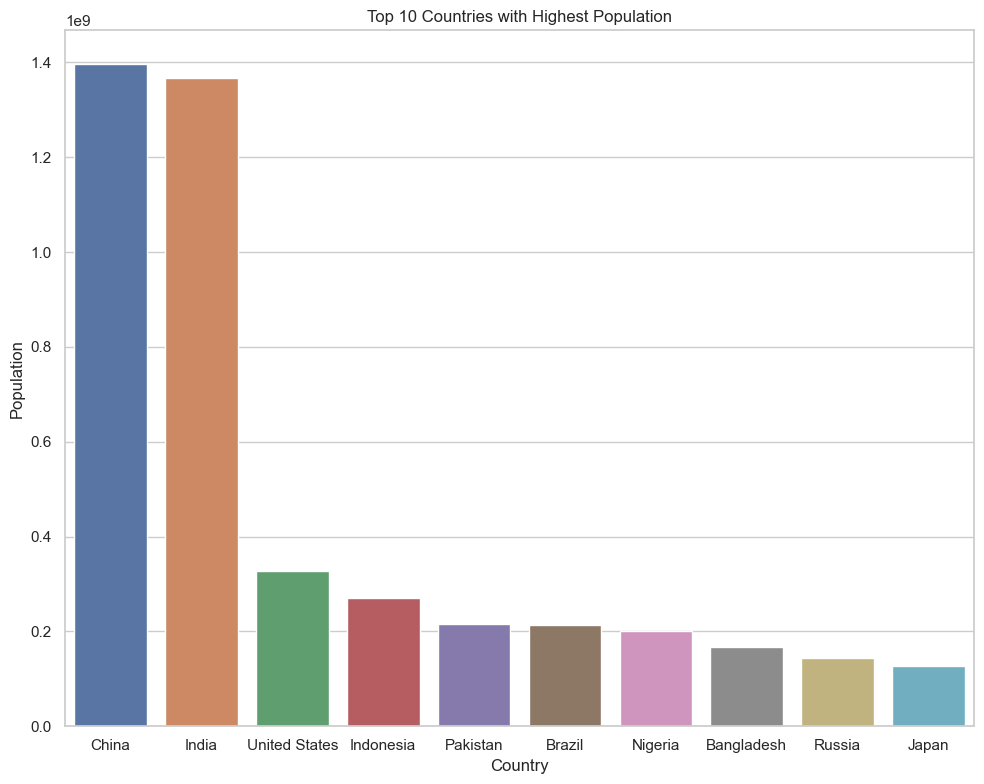

In [25]:
#top10 country w/highest population
top_population_countries = df.nlargest(10, 'Population')

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

ax = sns.barplot(x='Country', y='Population', data=top_population_countries)

ax.set_title(f"Top {10} Countries with Highest Population")
ax.set_xlabel("Country")
ax.set_ylabel("Population")
plt.tight_layout()
plt.show()


In [27]:
#display average fertility rates by country
Avg_fertility_by_currency = df.groupby('Country')['Fertility_Rate'].mean()

print("Average Fertility Rate by Currency Code:")
print(Avg_fertility_by_currency)

Average Fertility Rate by Currency Code:
Country
Afghanistan    4.47
Albania        1.62
Algeria        3.02
Andorra        1.27
Angola         5.52
               ... 
Venezuela      2.27
Vietnam        2.05
Yemen          3.79
Zambia         4.63
Zimbabwe       3.62
Name: Fertility_Rate, Length: 195, dtype: float64


In [29]:
#Calculate and display countries with highest life expectancy 
Highest = df.groupby('Country')['Life_Expectancy'].max().nlargest(5)
print(Highest)

Country
San Marino     85.4
Japan          84.2
Switzerland    83.6
Spain          83.3
Singapore      83.1
Name: Life_Expectancy, dtype: float64


In [30]:
#Calculate and display countries with lowest life expectancy 
Lowest = df.groupby('Country')['Life_Expectancy'].min().nsmallest(5)
print(Lowest)

Country
Central African Republic    52.8
Lesotho                     53.7
Chad                        54.0
Nigeria                     54.3
Sierra Leone                54.3
Name: Life_Expectancy, dtype: float64


In [31]:
#distinguish between fertility rates and birth rates
birth_fertility_comparison = df[['Country', 'Birth_Rate', 'Fertility_Rate']]
print(birth_fertility_comparison)

         Country  Birth_Rate  Fertility_Rate
0    Afghanistan       32.49            4.47
1        Albania       11.78            1.62
2        Algeria       24.28            3.02
3        Andorra        7.20            1.27
4         Angola       40.73            5.52
..           ...         ...             ...
190    Venezuela       17.88            2.27
191      Vietnam       16.75            2.05
192        Yemen       30.45            3.79
193       Zambia       36.19            4.63
194     Zimbabwe       30.68            3.62

[195 rows x 3 columns]


In [33]:
#compare life expectancy with physicians per thousand
life_physicians_comparison = df[['Country', 'Life_Expectancy', 'Physicians_Per_Thousand']]
print(life_physicians_comparison)

         Country  Life_Expectancy  Physicians_Per_Thousand
0    Afghanistan             64.5                     0.28
1        Albania             78.5                     1.20
2        Algeria             76.7                     1.72
3        Andorra             73.2                     3.33
4         Angola             60.8                     0.21
..           ...              ...                      ...
190    Venezuela             72.1                     1.92
191      Vietnam             75.3                     0.82
192        Yemen             66.1                     0.31
193       Zambia             63.5                     1.19
194     Zimbabwe             61.2                     0.21

[195 rows x 3 columns]
